In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelBinarizer as lb
#kera
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
import seaborn as sns

In [42]:
label=pd.read_csv("label_consonants_vowels.csv")
label.drop(columns='Unnamed: 0',inplace=True)
df=pd.read_csv('data.csv')
df.drop(columns='Unnamed: 0',inplace=True)
# df=df.sample(frac=1)
# train_x=np.transpose(df[:,1:])

    

In [43]:
labeling = dict(zip(label.Key,label.Hindi))

# labeling=labeling[:,-1]
print(labeling)

{1.0: 'क', 2.0: 'ख', 3.0: 'ग', 4.0: 'घ', 5.0: 'ङ', 6.0: 'च', 7.0: 'छ', 8.0: 'ज', 9.0: 'झ', 10.0: 'ञ', 11.0: 'ट', 12.0: 'ठ', 13.0: 'ड', 14.0: 'ढ', 15.0: 'ण', 16.0: 'त', 17.0: 'थ', 18.0: 'द', 19.0: 'ध', 20.0: 'न', 21.0: 'प', 22.0: 'फ', 23.0: 'ब', 24.0: 'भ', 25.0: 'म', 26.0: 'य', 27.0: 'र', 28.0: 'ल', 29.0: 'व', 30.0: 'श', 31.0: 'ष', 32.0: 'स', 33.0: 'ह', 34.0: 'क्ष', 35.0: 'त्र', 36.0: 'ज्ञ', 37.0: 'अ', 38.0: 'आ', 39.0: 'इ', 40.0: 'ई', 41.0: 'उ', 42.0: 'ऊ', 43.0: 'ए', 44.0: 'ऐ', 45.0: 'ओ', 46.0: 'औ', 47.0: 'अं', 48.0: 'अः', nan: nan}


In [44]:
def show_image(df_x,df_y,n):
    k=(df_x[n]*255).astype(int)

    print(k.shape)


    plt.imshow(k, cmap=plt.get_cmap('gray'))
    la=l_b.inverse_transform(df_y[n:n+1])
    la=list(la)
    k=labeling[la[0]]
    print(k)
    plt.title(la[0])


In [45]:
train_x=np.transpose(df.values[:,1:].reshape(len(df),28,28,1),axes=[0,1,2,3])
train_y=df['Key']
num_classes=train_y.nunique()
train_y=np.asarray(train_y)

In [46]:
total=len(train_y)
total=int(total/50)
print(total)

1493


In [47]:
l_b=lb()
Y=l_b.fit_transform(train_y)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(train_x,Y,test_size=0.20,random_state=2)

In [49]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(32, 32, 1)


TypeError: Invalid shape (32, 32, 1) for image data

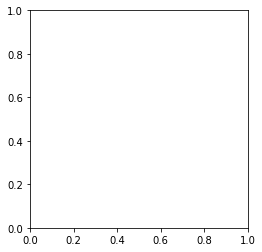

In [50]:
show_image(x_train,y_train,1)



In [11]:
# some=l_b.inverse_transform(Y)
# print(some)

In [51]:
print(num_classes)

29


In [13]:
# model=Sequential()
# model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(128, kernel_size = 4, activation='relu'))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dropout(0.4))
# model.add(Dense(29, activation='softmax'))

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [52]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation="softmax"))

In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [54]:
checkpoint = ModelCheckpoint('Model.h5',
                                 monitor='val_acc',
                                 verbose=1,
                                 save_best_only=False,
                                 mode='auto')

In [55]:
data_generator_aug=ImageDataGenerator(rotation_range=30,validation_split=0.1)
data_generator=ImageDataGenerator(validation_split=0.1)

In [ ]:
training_data_generator = data_generator_aug.flow(x_train,y_train,batch_size=200, subset='training')
validation_data_generator = data_generator.flow(x_train,y_train,batch_size=200,subset='validation')
history = model.fit(training_data_generator, steps_per_epoch=50, epochs=20, validation_data=validation_data_generator,validation_steps=1,callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 1 steps
Epoch 1/20
49/50 [============================>.] - ETA: 3s - loss: 3.6949 - accuracy: 0.0860
Epoch 00001: saving model to Model.h5
50/50 [==============================] - 191s 4s/step - loss: 3.6851 - accuracy: 0.0867 - val_loss: 9.2045 - val_accuracy: 0.0150
Epoch 2/20
 1/50 [..............................] - ETA: 3:06 - loss: 3.0400 - accuracy: 0.1200

In [22]:
model.save('Wights/model1.h5')

In [28]:
x_test.shape

(4012, 28, 28, 1)

In [29]:
t=model.predict(x_train[3:4])
k=l_b.inverse_transform(t)
print(k)

labeling[k[0]]

[21.]


'प'

(28, 28, 1)
प


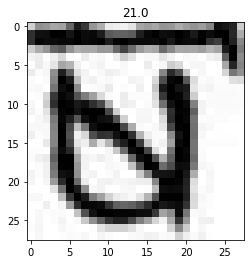

In [30]:

show_image(x_train,y_train,3)

In [ ]:
p=y_test[0:1]
c=l_b.inverse_transform(p)


In [1]:
score=model.evaluate(x_test,y_test,verbose=1)

NameError: name 'model' is not defined

Text(0, 0.5, 'Accuray')

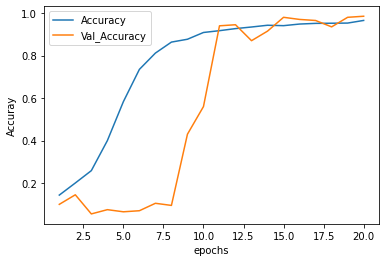

In [27]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')